In [ ]:
#Capstone 2
#Exploratory Data Analysis

In [53]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import os
import io 

# Show plots inline
%matplotlib inline

In [55]:
#Open DataFrame from last part of the project
df_data = pd.read_csv('healthcare_homeless_cleaned.csv')
df_data

,Unnamed: 0,Year,Overall Homeless,Housing Prices,Unemployment rate,Obama ACA Indicator,"CPI California, Urban Consumers","Healthcare Cost, California"
0,0,2007,71320,254.0,5.1,0.0,217.0,209334.000000
1,1,2008,65111,208.0,7.5,0.0,225.0,220894.000000
2,2,2009,33243,176.0,11.7,0.0,224.0,229415.000000
3,3,2010,63706,174.0,12.6,1.0,227.0,241845.000000
4,4,2011,56257,166.0,12.2,1.0,233.0,253703.000000
5,5,2012,49955,165.0,11.0,1.0,238.0,267048.000000
6,6,2013,52442,180.0,9.8,1.0,242.0,277008.000000
7,7,2014,43854,204.0,8.2,1.0,246.0,288330.000000
8,8,2015,41174,216.0,6.7,1.0,250.0,311146.000000
9,9,2016,34393,232.0,5.3,1.0,255.0,325931.000000


In [57]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       17 non-null     int64  
 1   Year                             17 non-null     int64  
 2   Overall Homeless                 17 non-null     int64  
 3   Housing Prices                   17 non-null     float64
 4   Unemployment rate                17 non-null     float64
 5   Obama ACA Indicator              17 non-null     float64
 6   CPI California, Urban Consumers  17 non-null     float64
 7   Healthcare Cost, California      17 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 1.2 KB


In [59]:
#Everything looks okay and I filled in all the na's during the wrangling. But there does seem to be a new column, unnamed.
df_data = df_data[['Year', 'Overall Homeless', 'Housing Prices', 'Unemployment rate', 'Obama ACA Indicator', 'CPI California, Urban Consumers', 'Healthcare Cost, California']]
df_data.isna().any()

Year                               False
Overall Homeless                   False
Housing Prices                     False
Unemployment rate                  False
Obama ACA Indicator                False
CPI California, Urban Consumers    False
Healthcare Cost, California        False
dtype: bool

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

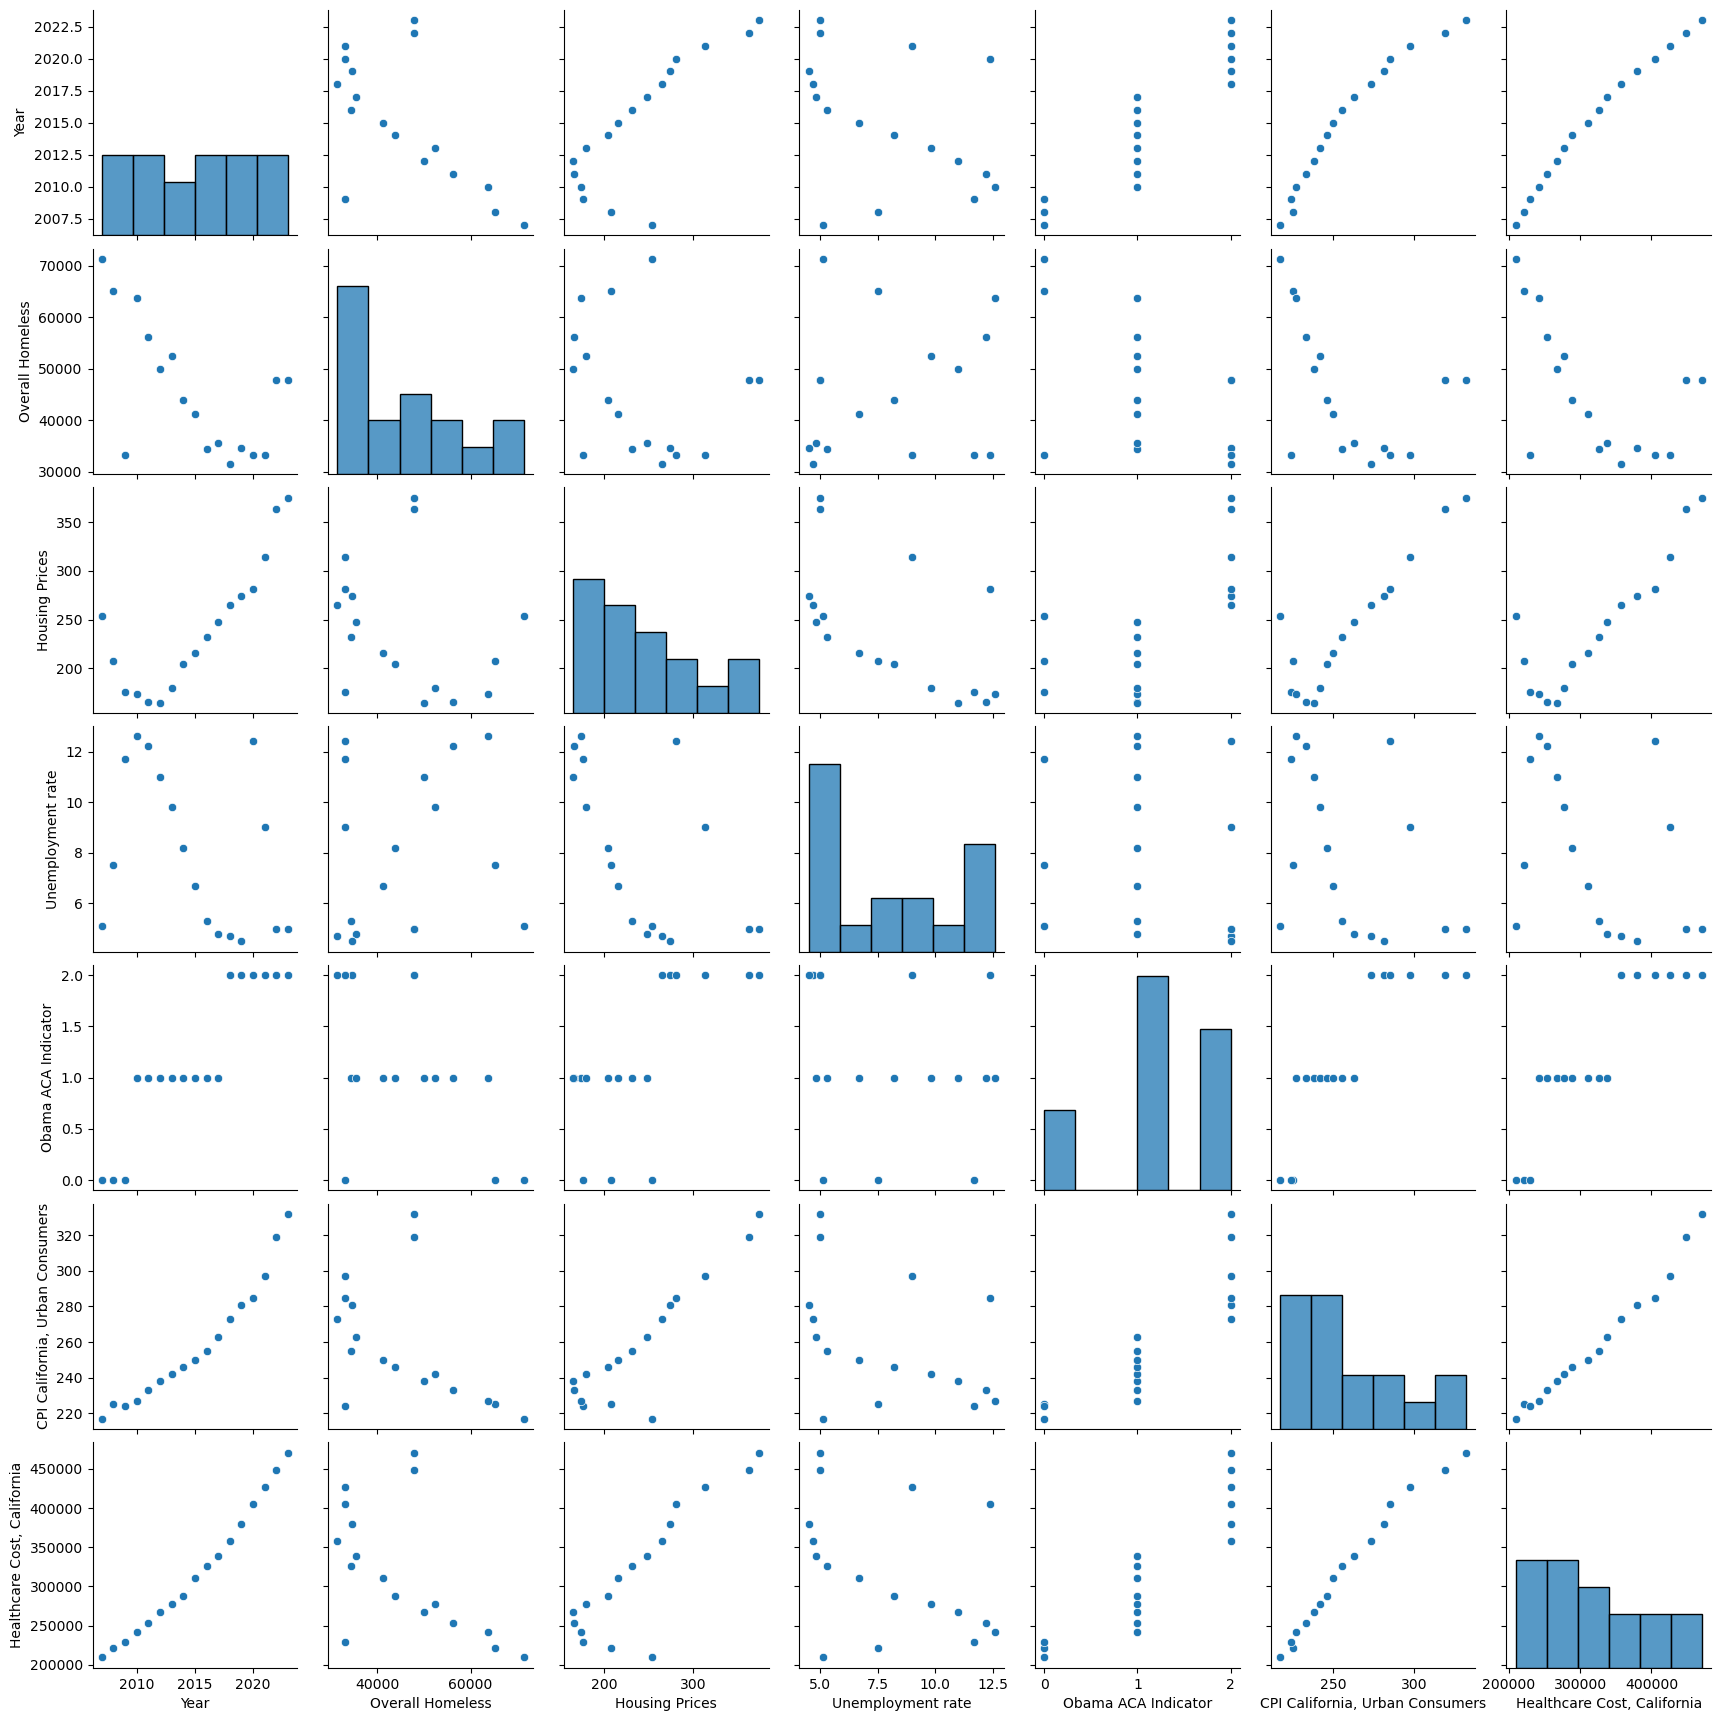

In [61]:
#Let's look at some figures.
sns.pairplot(df_data)

<Axes: >

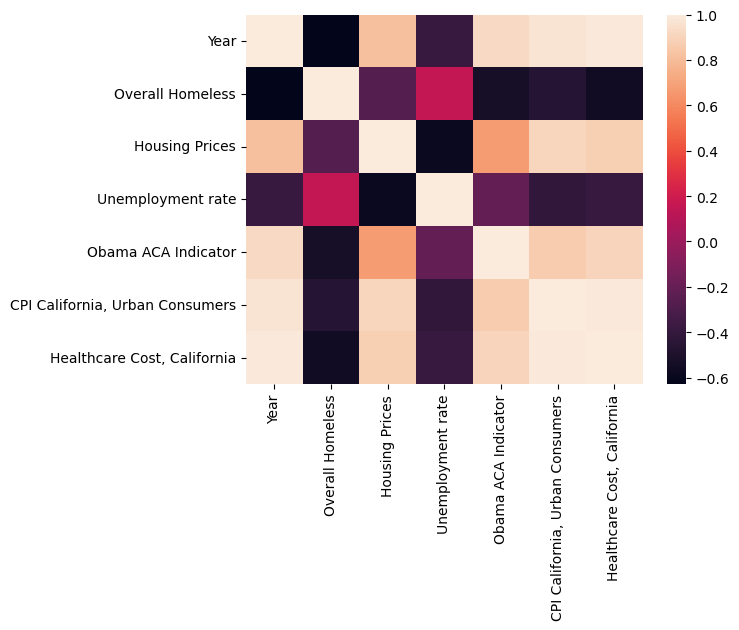

In [62]:
#It looks like there is quite a fair amount of correlation, but some of it could just be standard increases each year.
#I'll make a heatmap to see whether there is correlation between other variables, not just price increases.
sns.heatmap(df_data.corr())

In [ ]:
#It looks like some of the main indicators of overall homelessness in Los Angeles, apart from a general trend of increase,
#could be the Obama ACA indicator, Healthcare costs, and the Consumer Price Index (CPI). 

In [75]:
#I will import the worldbank data for the USA as a whole and see if any indicators should be used in this model.
worldbank = pd.read_csv('/Users/ofrioren/GIT/Capstone/world bank data/worldbank_cleaned.csv')
worldbank

,Unnamed: 0,Year,Poverty ratio at $2.15 a day,Current health expenditure (% of GDP),Out-of-pocket expenditure per capita,Out-of-pocket expenditure (% of current healthcare),Proportion of population pushed below the $2.1,Proportion of population pushed below the $3.6,Proportion of population pushed further below (1),Proportion of population spending more than 10,Proportion of population pushed further below (2),Risk of catastrophic expenditure for surgical,Proportion of population spending more than 25,Risk of impoverishing expenditure for surgical,Proportion of population pushed below the 60%,Proportion of population pushed further below (3),Proportion of people living below 50 percent of median,Poverty headcount ratio at societal poverty line,Poverty headcount ratio at $3.65 a day (2017 PPP),Poverty headcount ratio at $6.85 a day (2017 PPP)
0,0,2000,0.7,12.490026,685.395545,15.117374,0.01,0.0,0.03,5.94,0.0,0.0,1.08,0.0,1.31,9.23,17.5,18.7,1.0,1.5
1,1,2014,1.2,16.199198,1058.308042,11.987437,0.00,0.0,0.01,4.90,0.0,0.8,0.74,0.5,1.01,8.44,17.0,18.7,1.5,2.0
2,2,2015,1.2,16.490568,1089.018652,11.774530,0.00,0.0,0.03,4.40,0.0,0.7,0.77,0.4,0.76,7.43,17.2,18.7,1.2,2.2
3,3,2016,1.0,16.802158,1118.350962,11.649622,0.00,0.0,0.06,4.47,0.0,0.6,0.66,0.4,0.66,7.68,18.0,19.2,1.2,2.0
4,4,2017,1.2,16.767502,1130.686646,11.417827,0.00,0.0,0.00,4.50,0.0,0.6,0.73,0.4,0.76,7.83,18.2,19.7,1.5,2.0
5,5,2018,1.0,16.629644,1164.601932,11.328232,0.00,0.0,0.00,4.51,0.0,0.6,0.77,0.4,0.79,8.51,18.2,19.5,1.2,1.7
6,6,2019,1.0,16.665806,1205.284197,11.308306,0.00,0.0,0.00,4.35,0.0,0.6,0.74,0.4,0.72,8.12,18.5,19.5,1.2,1.7
7,7,2020,0.2,18.756220,1167.734563,9.931046,0.00,0.0,0.00,3.98,0.0,0.3,0.73,0.3,0.58,7.36,17.0,18.2,0.5,1.2
8,8,2021,0.2,17.362568,1285.330047,10.700169,0.00,0.0,0.00,4.61,0.0,0.3,0.89,0.2,0.62,7.57,15.5,16.7,0.5,1.0


TypeError: cannot unpack non-iterable FacetGrid object

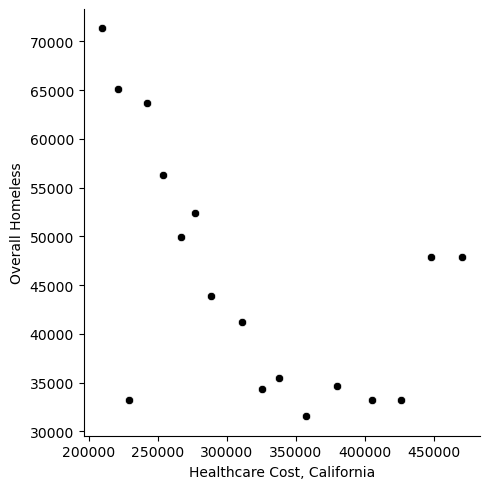

In [97]:
#Data from the worldbank is USA-wide and does not have the same years as my homelessness dataset. I'll do some plotting 
#to get an idea of how things match up. 

fig, ax = sns.relplot(x= 'Healthcare Cost, California', y='Overall Homeless', data=df_data, color='k')
plt.show()

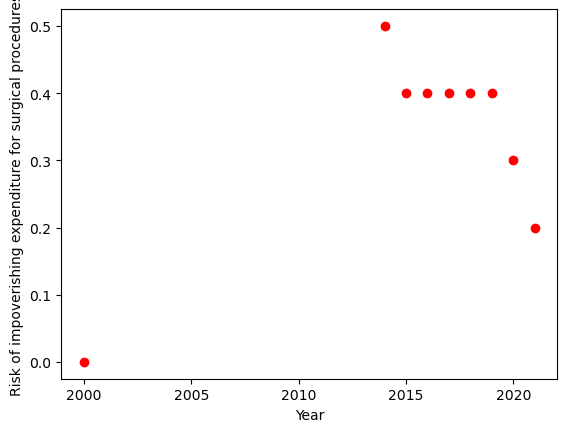

In [103]:
#It does seem that there is a strong correlation between healthcare cost and homelessness, but surprisingly it is negative.
#It could be reflective of general trends (ie. healthcare keeps rising while Los Angeles is getting better at housing people.) 
#It does seems surprising, it is also unclear whether there are outliers to the general trend or whether there is an error in 
#the homelessness data reported, as those last two values close to 50,000 seem to be the same from 2022-2023.

#I'm going to look at expenditures from the worldbank data and see what this indicates.
plt.scatter(x='Year', y= 'Risk of impoverishing expenditure for surgical', data=worldbank, color='r')
plt.xlabel('Year')
plt.ylabel('Risk of impoverishing expenditure for surgical procedures')
plt.show()

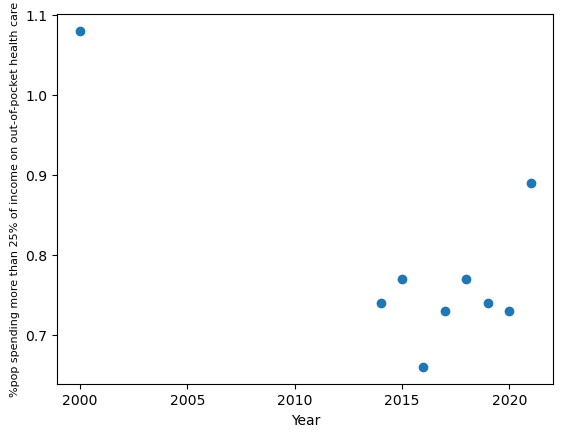

In [139]:
#Overall costs for healthcare in California are rising, but across the USA the risk of impoverishing expenditures are falling.

plt.scatter(x='Year', y='Proportion of population spending more than 25', data=worldbank)
plt.xlabel('Year')
plt.ylabel('%pop spending more than 25% of income on out-of-pocket health care', size=8)
plt.show()

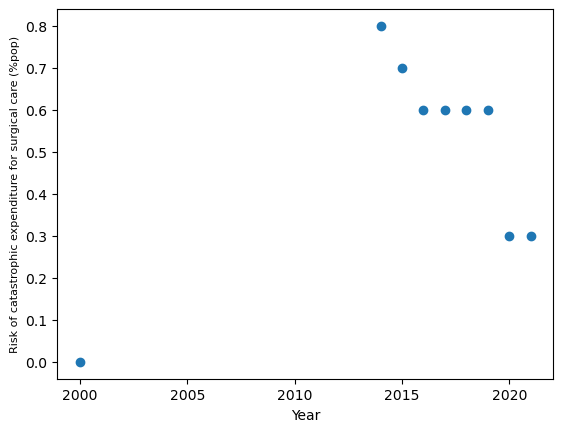

In [149]:
#The "Proportion of population spending more than 25% of household consumption or income on out-of-pocket health care 
# expenditure" seems to hover around %75. Lastly, let's look at 

plt.scatter(x='Year', y='Risk of catastrophic expenditure for surgical', data=worldbank)
plt.xlabel('Year')
plt.ylabel('Risk of catastrophic expenditure for surgical care (%pop)', size=8)
plt.show()

In [143]:
#In the last two years the percentage of people at risk for catastrophic expenditures for surgical care has gone down.
#It could indicate that there is a larger proportion of healthier people in the population for whatever reason.
#It also seems to indicate that while healthcare costs are rising fewer people need the kind of procedures that are costly.

In [166]:
#I'll look at a subset of the worldbank data to get a better idea of what is going on there.
worldbank_sub = pd.read_csv('/Users/ofrioren/GIT/Capstone/world bank data/worldbank_subset_cleaned.csv')

worldbank_sub=worldbank_sub[['Year', 'Out-of-pocket expenditure per capita', 'Proportion of population spending more than 10', 'Risk of catastrophic expenditure for surgical', 
                         'Proportion of population spending more than 25', 'Risk of impoverishing expenditure for surgical', 'Poverty headcount ratio at societal poverty line']]
worldbank_sub

,Year,Out-of-pocket expenditure per capita,Proportion of population spending more than 10,Risk of catastrophic expenditure for surgical,Proportion of population spending more than 25,Risk of impoverishing expenditure for surgical,Poverty headcount ratio at societal poverty line
0,2000,685.395545,5.94,0.0,1.08,0.0,18.7
1,2014,1058.308042,4.90,0.8,0.74,0.5,18.7
2,2015,1089.018652,4.40,0.7,0.77,0.4,18.7
3,2016,1118.350962,4.47,0.6,0.66,0.4,19.2
4,2017,1130.686646,4.50,0.6,0.73,0.4,19.7
5,2018,1164.601932,4.51,0.6,0.77,0.4,19.5
6,2019,1205.284197,4.35,0.6,0.74,0.4,19.5
7,2020,1167.734563,3.98,0.3,0.73,0.3,18.2
8,2021,1285.330047,4.61,0.3,0.89,0.2,16.7


In [168]:
worldbank_sub['LA Homeless'] = df_data['Overall Homeless']
worldbank_sub

,Year,Out-of-pocket expenditure per capita,Proportion of population spending more than 10,Risk of catastrophic expenditure for surgical,Proportion of population spending more than 25,Risk of impoverishing expenditure for surgical,Poverty headcount ratio at societal poverty line,LA Homeless
0,2000,685.395545,5.94,0.0,1.08,0.0,18.7,71320
1,2014,1058.308042,4.90,0.8,0.74,0.5,18.7,65111
2,2015,1089.018652,4.40,0.7,0.77,0.4,18.7,33243
3,2016,1118.350962,4.47,0.6,0.66,0.4,19.2,63706
4,2017,1130.686646,4.50,0.6,0.73,0.4,19.7,56257
5,2018,1164.601932,4.51,0.6,0.77,0.4,19.5,49955
6,2019,1205.284197,4.35,0.6,0.74,0.4,19.5,52442
7,2020,1167.734563,3.98,0.3,0.73,0.3,18.2,43854
8,2021,1285.330047,4.61,0.3,0.89,0.2,16.7,41174


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

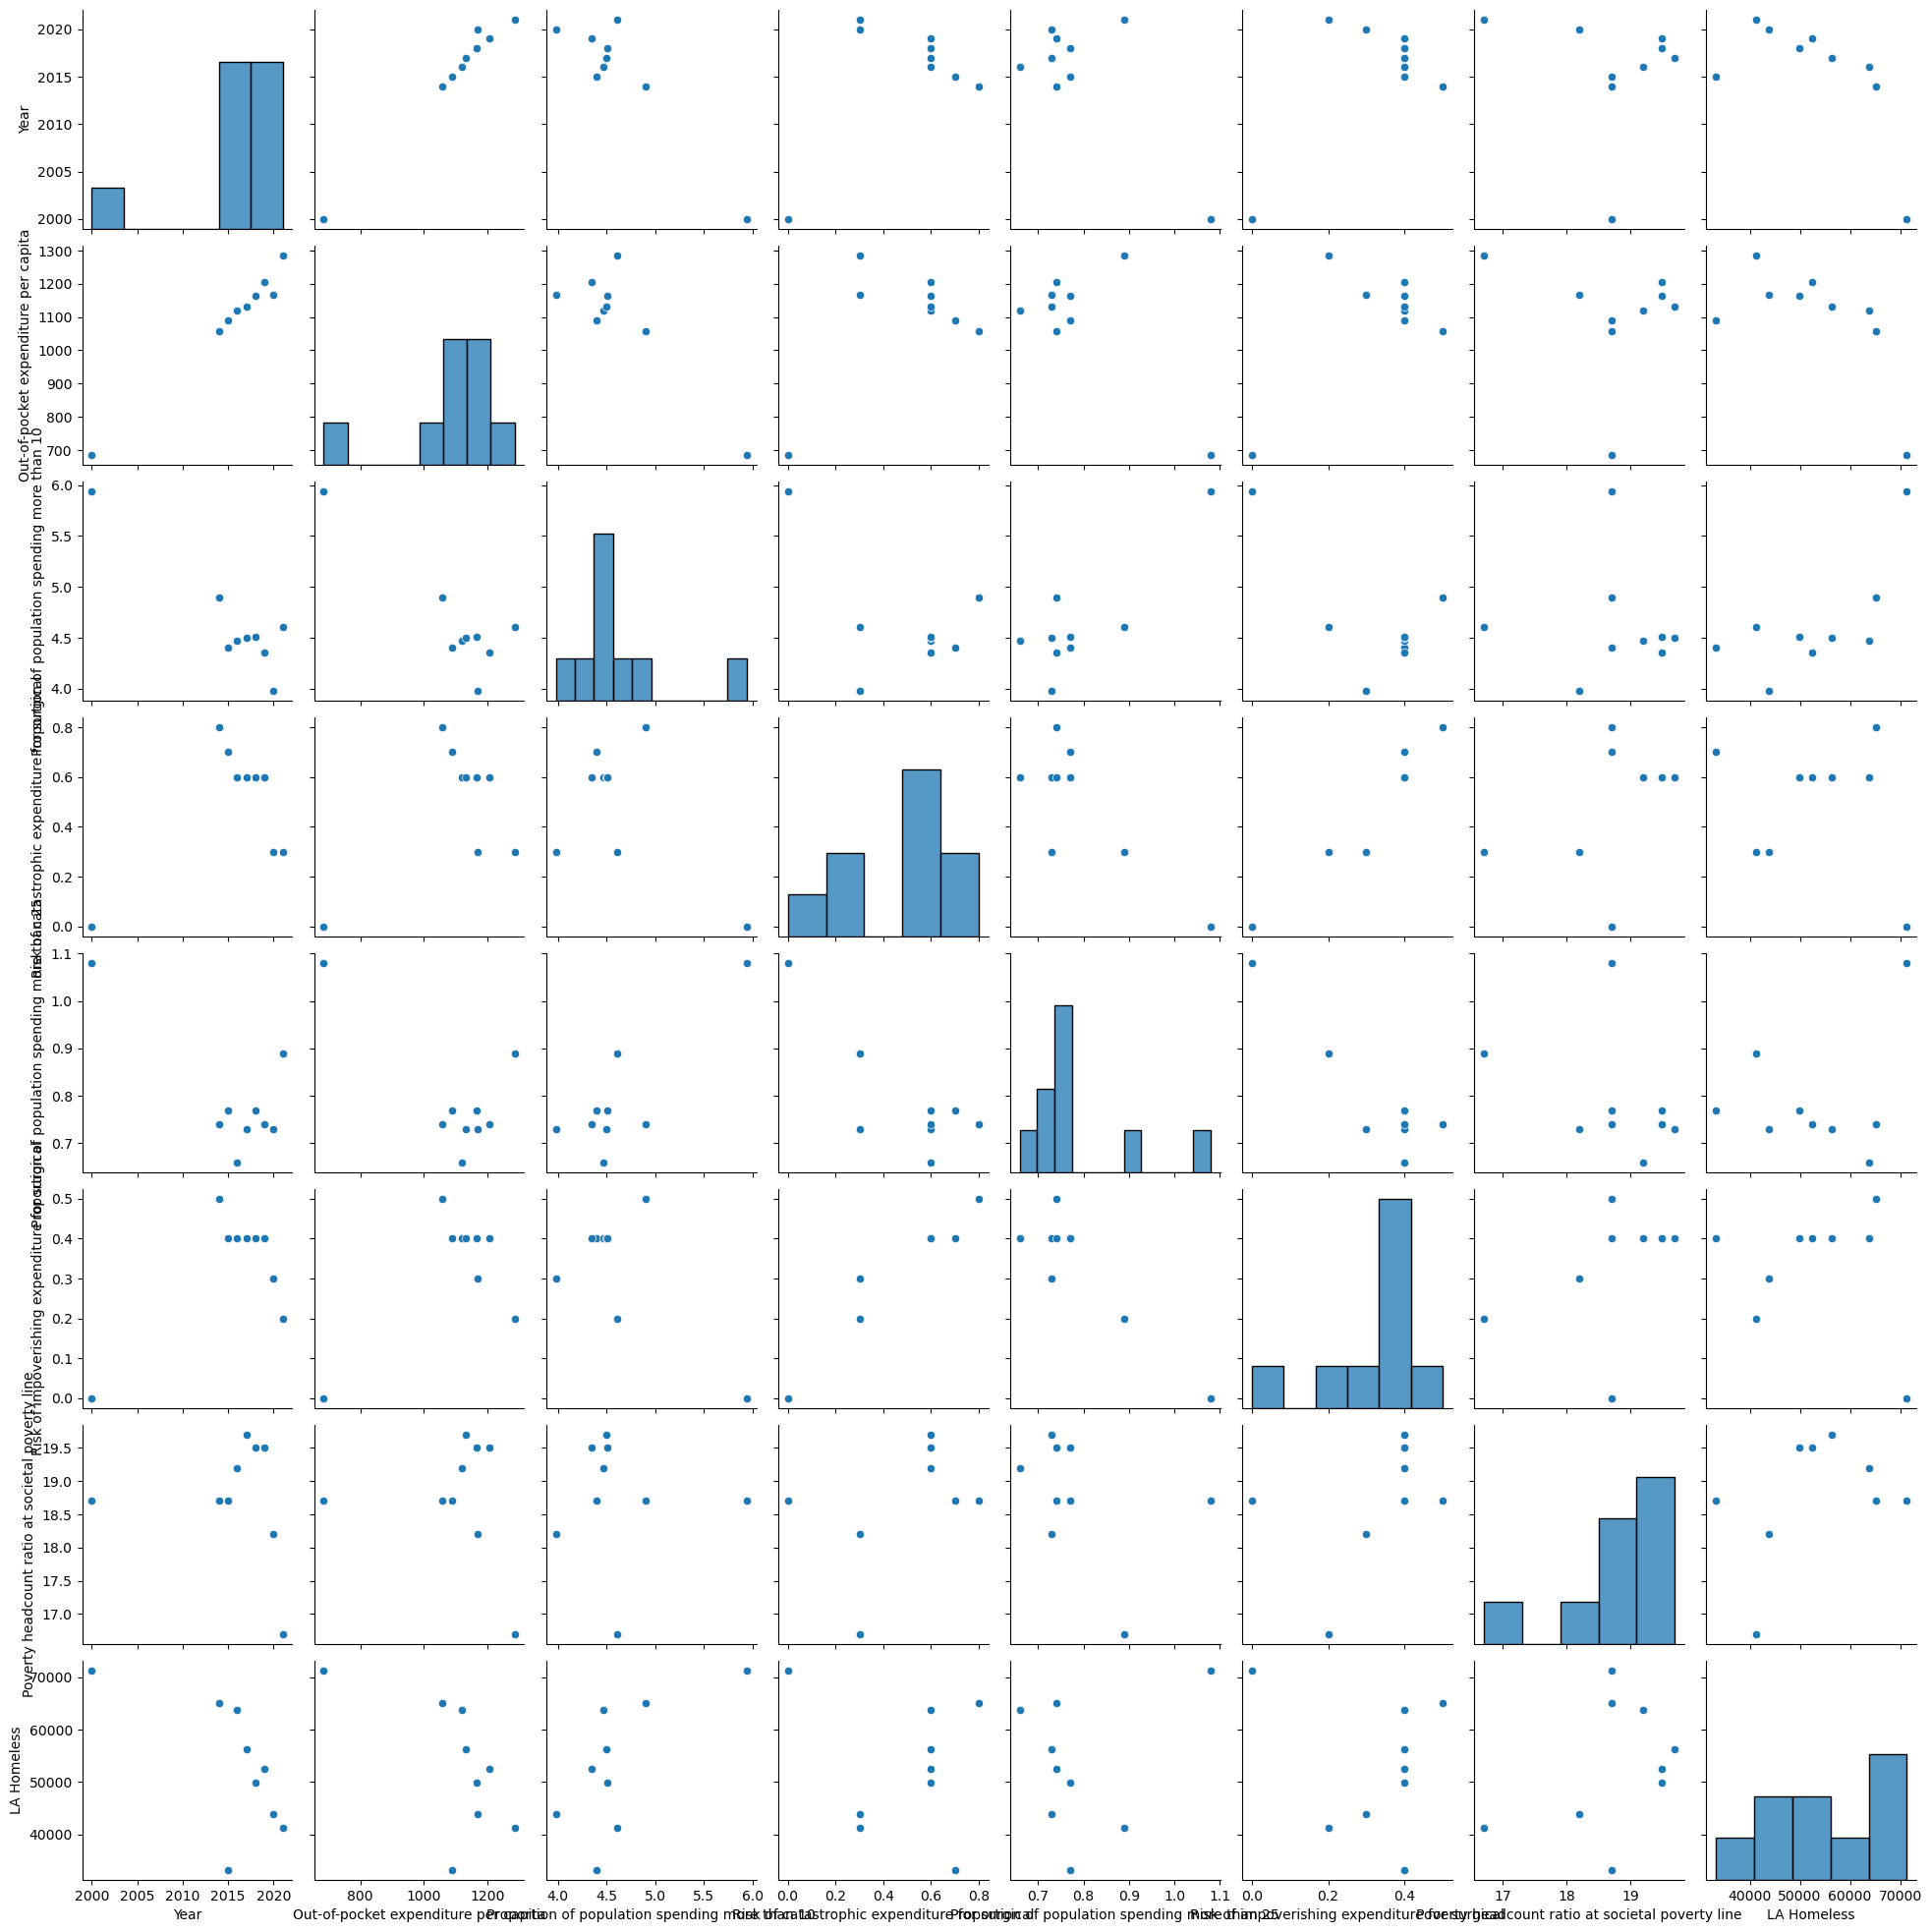

In [170]:
#Let's see what pairplots can show us here.
sns.pairplot(worldbank_sub)

In [145]:
#It doesn't look like any US indicators are strongly correlated with the homelessness rate in LA.
#In the next part of the project I plan to see which indicators are most strongly correlated with homelessness outcomes.
#I will then create and train a pipleline to predict homelessness outcomes for Los Angeles based on local and California data.